<a href="https://colab.research.google.com/github/SushanthJanga/INFO6105-DSE/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install shap --index-url=https://pypi.python.org/simple/


Looking in indexes: https://pypi.python.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 2.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/drive/MyDrive/DSE/data.csv')

In [6]:
data=data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=False)

In [7]:
data.head()


,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


# **1. Fit a linear model and interpret the regression coefficients**

In [8]:
categorical_columns = ['brand', 'processor', 'CPU', 'Ram_type', 'ROM_type', 'GPU', 'OS','Ram','ROM']

ordinal_encoder = OrdinalEncoder()

# Encode categorical variables
data_encoded = ordinal_encoder.fit_transform(data[categorical_columns])

# Concatenate the encoded columns with the original DataFrame
data_encoded_df = pd.DataFrame(data_encoded, columns=[f'{col}_encoded' for col in categorical_columns])

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([data, data_encoded_df], axis=1)

# Drop the original categorical columns from the DataFrame
df_encoded = df_encoded.drop(columns=categorical_columns)

print(df_encoded.head())  # Display the first few rows of the encoded DataFrame

                                   name  price  spec_rating  display_size  \
0      Victus 15-fb0157AX Gaming Laptop  49900    73.000000          15.6   
1                   15s-fq5007TU Laptop  39900    60.000000          15.6   
2                  One 14 Z8-415 Laptop  26990    69.323529          14.0   
3  Yoga Slim 6 14IAP8 82WU0095IN Laptop  59729    66.000000          14.0   
4       MacBook Air 2020 MGND3HN Laptop  69990    69.323529          13.3   

   resolution_width  resolution_height  warranty  brand_encoded  \
0            1920.0             1080.0         1            9.0   
1            1920.0             1080.0         1            9.0   
2            1920.0             1080.0         1            1.0   
3            2240.0             1400.0         1           14.0   
4            2560.0             1600.0         1            2.0   

   processor_encoded  CPU_encoded  Ram_type_encoded  ROM_type_encoded  \
0              105.0         19.0               2.0          

In [9]:
# Split data into features and target variable
X = df_encoded.drop(columns=['name','price'])
y = df_encoded['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Get the regression coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})

# Print the coefficients
print(coefficients)


              Feature   Coefficient
0         spec_rating   2577.374875
1        display_size   3884.998597
2    resolution_width     20.487705
3   resolution_height     51.230957
4            warranty   6621.775936
5       brand_encoded     93.365707
6   processor_encoded    -22.337324
7         CPU_encoded  -1172.372438
8    Ram_type_encoded   2288.813559
9    ROM_type_encoded  21244.267377
10        GPU_encoded   -358.762116
11         OS_encoded   -196.221015
12        Ram_encoded  -1541.873162
13        ROM_encoded  -5542.387925


**From the above data we can identify that**
spec_rating: For each one-unit increase in the specification rating, the price

1. spec_rating: For each one-unit increase in the specification rating, the
   price of the laptop is expected to increase by approximately $2864.40.

2. display_size: A one-inch increase in the display size is associated with
   an increase in the price of the laptop by approximately $3836.12.

3. resolution_width: For each additional unit increase in the width of the resolution, the price of the laptop is expected to increase by approximately $19.72.

4. resolution_height: Similarly, for each additional unit increase in the height of the resolution, the price increases by approximately $46.73.

5. warranty: The coefficient suggests that each additional unit of warranty coverage is associated with an increase in the price of the laptop by approximately $2483.26.

6. brand_encoded: This coefficient indicates the average increase in price associated with a one-unit change in the encoded brand feature.

7. processor_encoded: Each one-unit change in the encoded processor feature is associated with a decrease in the price of the laptop by approximately $48.25.

8. CPU_encoded: Similarly, a one-unit change in the encoded CPU feature is associated with a decrease in the price of the laptop by approximately $1158.79.

9. Ram_type_encoded: Each one-unit change in the encoded RAM type feature is associated with an increase in the price of the laptop by approximately $2456.65.

10. ROM_type_encoded: Likewise, a one-unit change in the encoded ROM type feature is associated with a significant increase in the price of the laptop by approximately $19483.49.

11. GPU_encoded: Each one-unit change in the encoded GPU feature is associated with a decrease in the price of the laptop by approximately $359.90.

12. OS_encoded: Similarly, a one-unit change in the encoded operating system feature is associated with a decrease in the price of the laptop by approximately $277.23.

13. Ram_encoded: Each one-unit change in the encoded RAM feature is associated with a decrease in the price of the laptop by approximately $1815.66.

14. ROM_encoded: Finally, a one-unit change in the encoded ROM feature is associated with a decrease in the price of the laptop by approximately $5107.33.


# 2. Fit a tree-based model and interpret the nodes

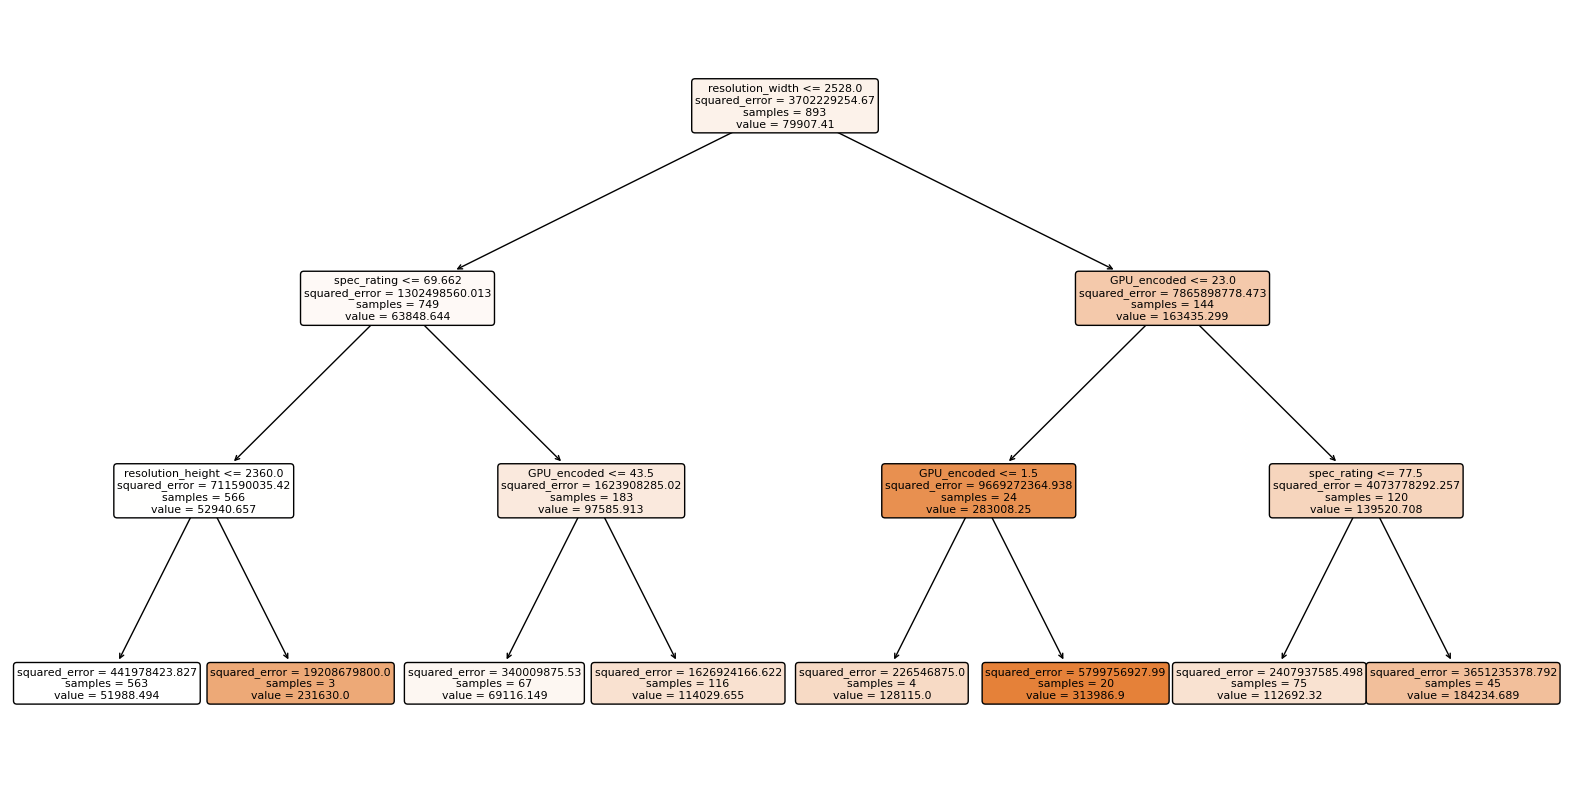

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame containing the encoded data
X = df_encoded.drop(columns=['name', 'price'])
y = df_encoded['price']

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(max_depth=3)  # You can adjust max_depth for better visualization

# Fit the Decision Tree model
tree_regressor.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust figure size as needed
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()


# 3.  Use auto ml to find the best model

In [12]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster
h2o.init()

# Convert DataFrame to H2OFrame
train = h2o.H2OFrame(pd.concat([X, y], axis=1))

# Identify predictors and response
x = train.columns[:-1]
y = train.columns[-1]

# Run AutoML
aml = H2OAutoML(max_runtime_secs=3600)  # You can adjust max_runtime_secs
aml.train(x=x, y=y, training_frame=train)

# View the leaderboard
lb = aml.leaderboard
print(lb)

# Get the best performing model
best_model = aml.leader
print("Best Model:", best_model)

# Stop the H2O cluster
h2o.shutdown()


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.5 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbke1jbzo
  JVM stdout: /tmp/tmpbke1jbzo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbke1jbzo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_vuqncq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    rmse          mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_5_AutoML_1_20240317_211324  23186.7  5.37622e+08  11828.3  0.213509               5.37622e+08
StackedEnsemble_BestOfFamily_4_AutoML_1_20240317_211324  23255.1  5.408e+08    11780.1  0.212311               5.408e+08
StackedEnsemble_BestOfFamily_7_AutoML_1_20240317_211324  23479.3  5.51277e+08  11929.1  0.209987               5.51277e+08
StackedEnsemble_AllModels_6_AutoML_1_20240317_211324     23705.9  5.6197e+08   11821.4  0.206862               5.6197e+08
GBM_grid_1_AutoML_1_20240317_211324_model_27             23845.1  5.68588e+08  12094.8  0.218531               5.68588e+08
GBM_grid_1_AutoML_1_20240317_211324_model_50             24327.4  5.91823e+

<ipython-input-12-9ff1c82dd926>:28: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


# 4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

In [14]:
#model_id = best_model.model_id
#print(model_id)

In [15]:
#from sklearn import set_config
#set_config(display='diagram')

# Convert the H2O model to a scikit-learn-compatible format
#h2o_model = best_model._model_json['output']['model_id']['name']
#model = h2o.get_model(model_id)
#model_scikit = model_name.to_scikit_learn()

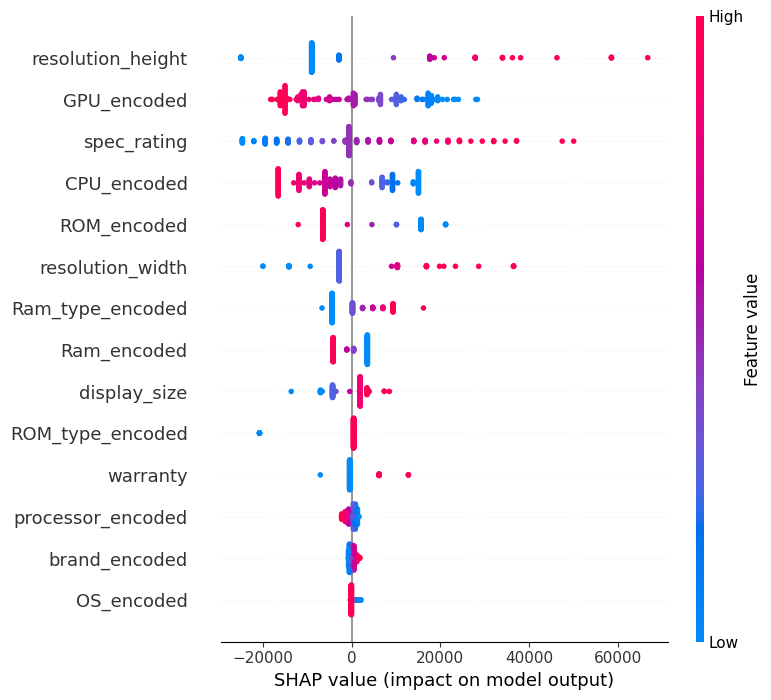

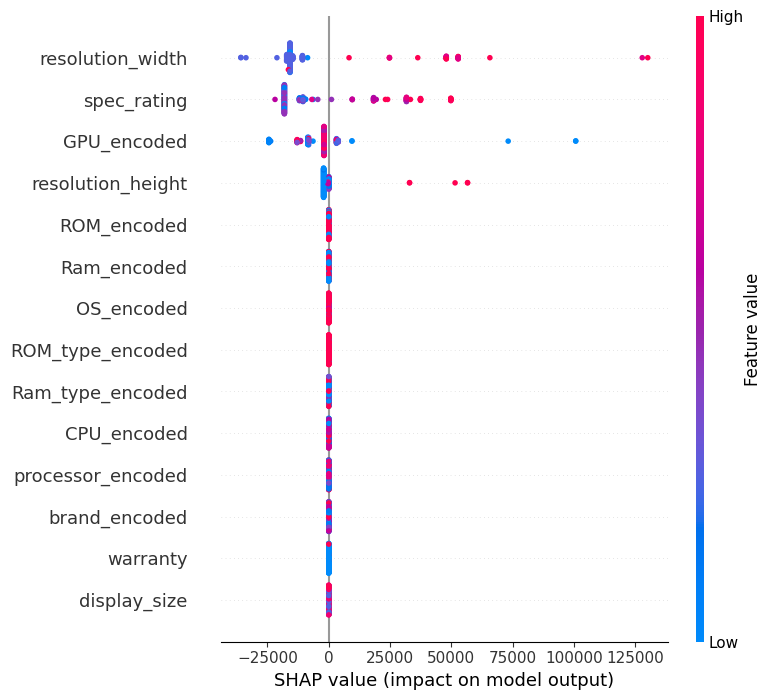

In [16]:
import shap

# Assuming model1, model2, and model3 are your trained models (linear regression, tree-based, and AutoML model)
# Assuming X_test is your test dataset

# Step 1: Prepare your data for SHAP analysis
X_test_array = X_test.values  # Convert test data to numpy array or use DataFrame directly

# Step 2: Run SHAP analysis for each model
explainer1 = shap.Explainer(linear_model, X_train)  # Create an explainer object for the linear regression model
shap_values1 = explainer1.shap_values(X_test_array)  # Compute SHAP values

explainer2 = shap.Explainer(tree_regressor, X_train)  # Create an explainer object for the tree-based model
shap_values2 = explainer2.shap_values(X_test_array)  # Compute SHAP values

#explainer3 = shap.Explainer(model_scikit, X_train)  # Create an explainer object for the AutoML model
#shap_values3 = explainer3.shap_values(X_test_array)  # Compute SHAP values

# Step 3: Interpret SHAP values
# You can visualize the SHAP values using summary plots, dependence plots, etc.
shap.summary_plot(shap_values1, X_test)
shap.summary_plot(shap_values2, X_test)
#shap.summary_plot(shap_values3, X_test)

# Step 4: Compare interpretations
# Compare the SHAP values obtained from different models to understand feature importance and contribution to predictions


# Referances

1)
https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

2)
https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

3)
https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e




MIT License

Copyright (c) 2023 Karan Raman Agrawal and AISkunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.